# 4 - Evaluación Ejecutiva y Recomendaciones

**Objetivo**

Resumir los insights de los análisis anteriores sobre la *Línea Joven* (18-25 años).

## 1. Cargar librerías

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# Directorios
data_dir = "../data/final"
fig_dir_final = "../reports/figures/final"
os.makedirs(fig_dir_final, exist_ok=True)

# Función para guardar y mostrar figuras
def guardar_y_mostrar(fig, nombre_archivo):
    path_fig = os.path.join(fig_dir_final, nombre_archivo)
    fig.savefig(path_fig)
    print(f"Figura guardada: {path_fig}")
    plt.show()
    plt.close(fig)

## 2. Carga de Datos Combinados
Leemos el CSV generado en `03_modeling.ipynb` para iniciar el análisis de evaluación.

In [34]:
df_combinado = pd.read_csv(os.path.join(data_dir, "df_combinado_linea_joven.csv"))
df_combinado['anio_mes'] = pd.to_datetime(df_combinado['anio_mes'])
df_combinado.sort_values('anio_mes', inplace=True)
df_combinado.reset_index(drop=True, inplace=True)

print("Primeras filas del dataset combinado:")
display(df_combinado.head())

Primeras filas del dataset combinado:


,anio_mes,unidades_vendidas,ingresos_totales,precio_promedio,visitas,tiempo_promedio_s,clics_total,add_to_cart_total,compras_total,inversion_total,conversiones_total
0,2024-05-01,500,609501,1590.937500,26,80.269231,10,4,3,30315,736
1,2024-06-01,377,507629,1502.785714,18,92.111111,9,3,0,44270,762
2,2024-07-01,473,629078,1617.000000,23,105.826087,10,4,2,38716,834
3,2024-08-01,404,529331,1457.200000,25,91.240000,6,1,0,49303,989
4,2024-09-01,403,582933,1622.000000,18,87.388889,3,1,0,32231,402


## 3 - Resumen Mensual Ejecutivo

Se genera un resumen mensual consolidado para la Línea Joven con métricas clave de ventas, web y marketing.
Se incluyen métricas derivadas como tasa de conversión web y retorno de inversión de marketing.

In [35]:
# Crear métricas derivadas
df_combinado['tasa_conversion_web'] = df_combinado['compras_total'] / df_combinado['visitas']
df_combinado['tasa_add_to_cart'] = df_combinado['add_to_cart_total'] / df_combinado['visitas']
df_combinado['roi_marketing'] = df_combinado['ingresos_totales'] / df_combinado['inversion_total']

# Reemplazar posibles infinitos o NaN
df_combinado.replace([np.inf, -np.inf], np.nan, inplace=True)
df_combinado.fillna(0, inplace=True)

# Mostrar resumen mensual en consola
resumen_mensual = df_combinado[['anio_mes','unidades_vendidas','ingresos_totales','precio_promedio',
'visitas','tiempo_promedio_s','clics_total','add_to_cart_total','compras_total',
'inversion_total','conversiones_total','tasa_conversion_web','tasa_add_to_cart','roi_marketing']]

print("Resumen Ejecutivo Mensual - Línea Joven:")
display(resumen_mensual)

Resumen Ejecutivo Mensual - Línea Joven:


,anio_mes,unidades_vendidas,ingresos_totales,precio_promedio,visitas,tiempo_promedio_s,clics_total,add_to_cart_total,compras_total,inversion_total,conversiones_total,tasa_conversion_web,tasa_add_to_cart,roi_marketing
0,2024-05-01,500,609501,1590.937500,26,80.269231,10,4,3,30315,736,0.115385,0.153846,20.105591
1,2024-06-01,377,507629,1502.785714,18,92.111111,9,3,0,44270,762,0.000000,0.166667,11.466659
2,2024-07-01,473,629078,1617.000000,23,105.826087,10,4,2,38716,834,0.086957,0.173913,16.248528
3,2024-08-01,404,529331,1457.200000,25,91.240000,6,1,0,49303,989,0.000000,0.040000,10.736284
4,2024-09-01,403,582933,1622.000000,18,87.388889,3,1,0,32231,402,0.000000,0.055556,18.086097
5,2024-10-01,452,587917,1642.290323,25,95.640000,5,2,1,50168,794,0.040000,0.080000,11.718964
6,2024-11-01,370,518732,1683.107143,27,89.037037,10,6,3,37177,490,0.111111,0.222222,13.953035
7,2024-12-01,408,504221,1306.461538,21,97.857143,6,2,0,33777,713,0.000000,0.095238,14.927939
8,2025-01-01,428,630441,1740.862069,20,88.500000,5,4,1,50224,675,0.050000,0.200000,12.552584
9,2025-02-01,491,679130,1541.266667,20,87.550000,5,3,3,18984,397,0.150000,0.150000,35.773810


### Observaciones iniciales

- `tasa_conversion_web` indica qué porcentaje de visitantes completan la compra.  
- `tasa_add_to_cart` indica engagement en la web.  
- `roi_marketing` muestra cuántos USD de ingresos se generan por cada USD invertido en marketing.  

Estos indicadores son clave para priorizar acciones en ventas, web y marketing.

## 4. Gráficos ejecutivos

Figura guardada: ../reports/figures/final\ventas_ingresos.png


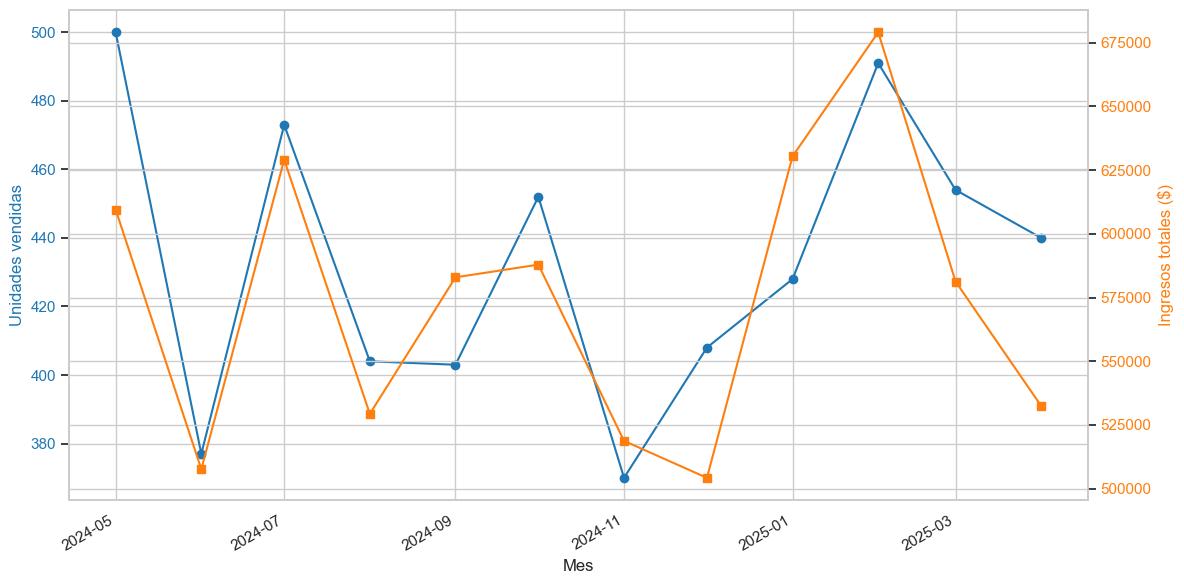

Figura guardada: ../reports/figures/final\roi_marketing.png


C:\Users\alexi\AppData\Local\Temp\ipykernel_15412\2102500439.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_combinado['anio_mes'].dt.strftime('%Y-%m'), rotation=45)


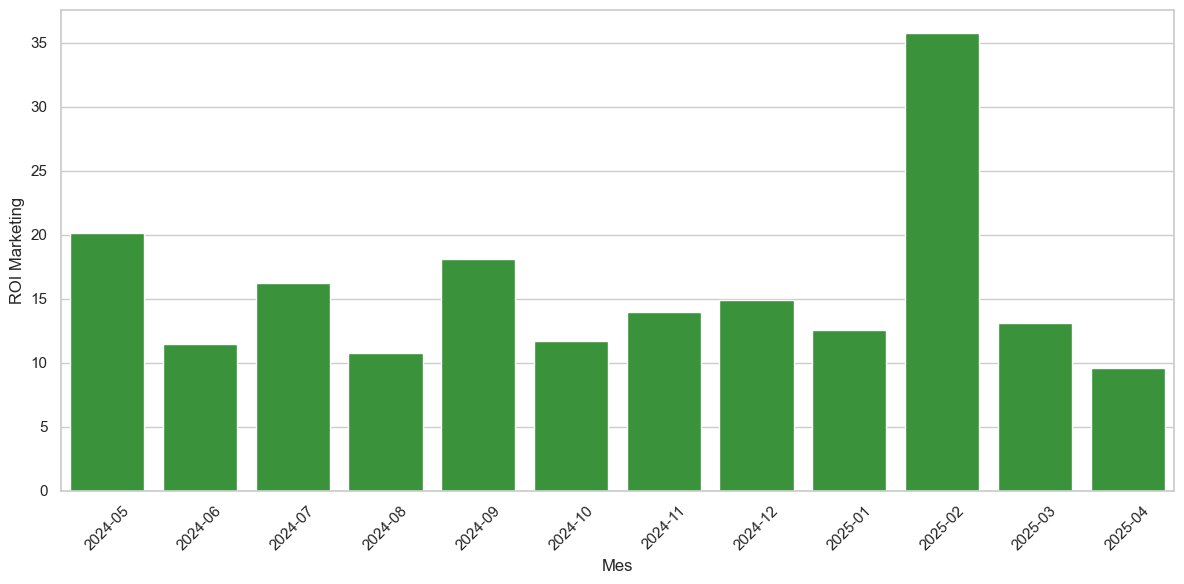

C:\Users\alexi\AppData\Local\Temp\ipykernel_15412\2102500439.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_combinado['anio_mes'].dt.strftime('%Y-%m'), rotation=45)


Figura guardada: ../reports/figures/final\tasas_conversion.png


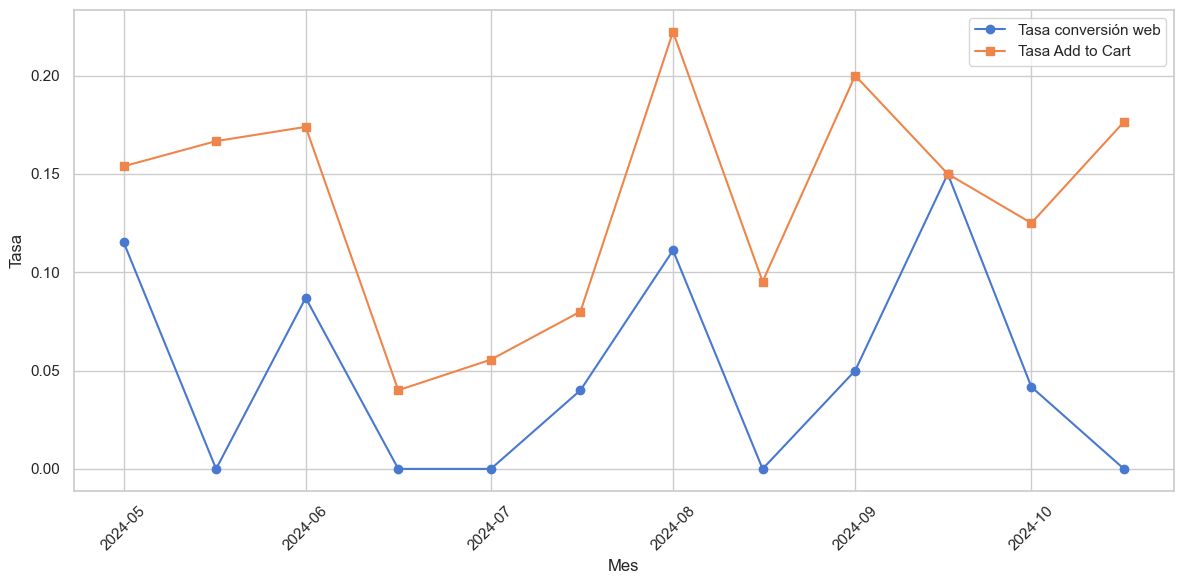

In [36]:
# 1. Ventas y ingresos
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(df_combinado['anio_mes'], df_combinado['unidades_vendidas'], marker='o', label='Unidades vendidas', color='tab:blue')
ax1.set_xlabel("Mes")
ax1.set_ylabel("Unidades vendidas", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax2 = ax1.twinx()
ax2.plot(df_combinado['anio_mes'], df_combinado['ingresos_totales'], marker='s', label='Ingresos totales', color='tab:orange')
ax2.set_ylabel("Ingresos totales ($)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.autofmt_xdate()
fig.tight_layout()
guardar_y_mostrar(fig, "ventas_ingresos.png")

# 2. ROI Marketing
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='anio_mes', y='roi_marketing', data=df_combinado, color='tab:green')
ax.set_xlabel("Mes")
ax.set_ylabel("ROI Marketing")
ax.set_xticklabels(df_combinado['anio_mes'].dt.strftime('%Y-%m'), rotation=45)
fig.tight_layout()
guardar_y_mostrar(fig, "roi_marketing.png")

# 3. Tasas de conversión
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_combinado['anio_mes'], df_combinado['tasa_conversion_web'], marker='o', label='Tasa conversión web')
ax.plot(df_combinado['anio_mes'], df_combinado['tasa_add_to_cart'], marker='s', label='Tasa Add to Cart')
ax.set_xlabel("Mes")
ax.set_ylabel("Tasa")
ax.set_xticklabels(df_combinado['anio_mes'].dt.strftime('%Y-%m'), rotation=45)
ax.legend()
fig.tight_layout()
guardar_y_mostrar(fig, "tasas_conversion.png")

## 5. Insights Rápidos

In [37]:
print("Resumen ejecutivo mensual:")
print("\nMes con mayor ROI Marketing:", df_combinado.loc[df_combinado['roi_marketing'].idxmax(), ['anio_mes','roi_marketing']])
print("Mes con menor ROI Marketing:", df_combinado.loc[df_combinado['roi_marketing'].idxmin(), ['anio_mes','roi_marketing']])
print("\nMes con mayor Tasa de conversión web:", df_combinado.loc[df_combinado['tasa_conversion_web'].idxmax(), ['anio_mes','tasa_conversion_web']])
print("Mes con menor Tasa de conversión web:", df_combinado.loc[df_combinado['tasa_conversion_web'].idxmin(), ['anio_mes','tasa_conversion_web']])
print("\nMes con mayor Ingresos Totales:", df_combinado.loc[df_combinado['ingresos_totales'].idxmax(), ['anio_mes','ingresos_totales']])
print("Mes con menor Ingresos Totales:", df_combinado.loc[df_combinado['ingresos_totales'].idxmin(), ['anio_mes','ingresos_totales']])

Resumen ejecutivo mensual:

Mes con mayor ROI Marketing: anio_mes         2025-02-01 00:00:00
roi_marketing               35.77381
Name: 9, dtype: object
Mes con menor ROI Marketing: anio_mes         2025-04-01 00:00:00
roi_marketing               9.576326
Name: 11, dtype: object

Mes con mayor Tasa de conversión web: anio_mes               2025-02-01 00:00:00
tasa_conversion_web                   0.15
Name: 9, dtype: object
Mes con menor Tasa de conversión web: anio_mes               2024-06-01 00:00:00
tasa_conversion_web                    0.0
Name: 1, dtype: object

Mes con mayor Ingresos Totales: anio_mes            2025-02-01 00:00:00
ingresos_totales                 679130
Name: 9, dtype: object
Mes con menor Ingresos Totales: anio_mes            2024-12-01 00:00:00
ingresos_totales                 504221
Name: 7, dtype: object


## 6. Exportación de resultados finales

In [38]:
final_csv_path = os.path.join(data_dir, "df_combinado_linea_joven_final.csv")
df_combinado.to_csv(final_csv_path, index=False)
print(f"Dataset final guardado en: {final_csv_path}")
print(f"Figuras guardadas en: {fig_dir_final}")

Dataset final guardado en: ../data/final\df_combinado_linea_joven_final.csv
Figuras guardadas en: ../reports/figures/final


## 7. Evolución Consolidada: Unidades, Ingresos y ROI Marketing

Figura guardada: ../reports/figures/final\evolucion_consolidada.png


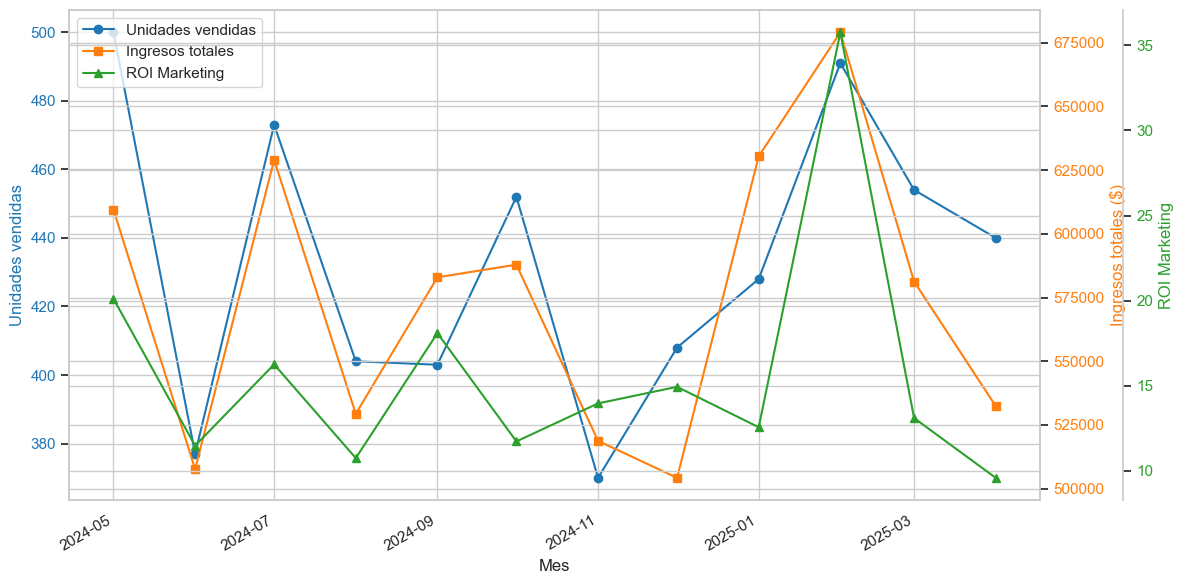

In [39]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Unidades vendidas
ax1.plot(df_combinado['anio_mes'], df_combinado['unidades_vendidas'], marker='o', label='Unidades vendidas', color='tab:blue')
ax1.set_xlabel("Mes")
ax1.set_ylabel("Unidades vendidas", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Ingresos totales
ax2 = ax1.twinx()
ax2.plot(df_combinado['anio_mes'], df_combinado['ingresos_totales'], marker='s', label='Ingresos totales', color='tab:orange')
ax2.set_ylabel("Ingresos totales ($)", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# ROI Marketing
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_combinado['anio_mes'], df_combinado['roi_marketing'], marker='^', label='ROI Marketing', color='tab:green')
ax3.set_ylabel("ROI Marketing", color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Leyenda combinada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

fig.autofmt_xdate()
fig.tight_layout()
guardar_y_mostrar(fig, "evolucion_consolidada.png")

## 8. Tabla Resumen Ejecutivo Final

In [40]:
# Extraemos insights clave
resumen_final = pd.DataFrame({
    "Indicador": ["Mayor ROI Marketing", "Menor ROI Marketing", "Mayor Tasa Conversión Web", "Menor Tasa Conversión Web",
                  "Mayor Ingresos Totales", "Menor Ingresos Totales"],
    "Mes": [
        df_combinado.loc[df_combinado['roi_marketing'].idxmax(), 'anio_mes'].strftime('%Y-%m'),
        df_combinado.loc[df_combinado['roi_marketing'].idxmin(), 'anio_mes'].strftime('%Y-%m'),
        df_combinado.loc[df_combinado['tasa_conversion_web'].idxmax(), 'anio_mes'].strftime('%Y-%m'),
        df_combinado.loc[df_combinado['tasa_conversion_web'].idxmin(), 'anio_mes'].strftime('%Y-%m'),
        df_combinado.loc[df_combinado['ingresos_totales'].idxmax(), 'anio_mes'].strftime('%Y-%m'),
        df_combinado.loc[df_combinado['ingresos_totales'].idxmin(), 'anio_mes'].strftime('%Y-%m')
    ],
    "Valor": [
        df_combinado['roi_marketing'].max(),
        df_combinado['roi_marketing'].min(),
        df_combinado['tasa_conversion_web'].max(),
        df_combinado['tasa_conversion_web'].min(),
        df_combinado['ingresos_totales'].max(),
        df_combinado['ingresos_totales'].min()
    ]
})

print("Resumen Ejecutivo Final - Línea Joven:")
display(resumen_final)

# Guardar CSV resumen final
resumen_csv_path = os.path.join(data_dir, "resumen_ejecutivo_linea_joven.csv")
resumen_final.to_csv(resumen_csv_path, index=False)
print(f"Tabla de resumen ejecutivo guardada en: {resumen_csv_path}")

Resumen Ejecutivo Final - Línea Joven:


,Indicador,Mes,Valor
0,Mayor ROI Marketing,2025-02,35.773810
1,Menor ROI Marketing,2025-04,9.576326
2,Mayor Tasa Conversión Web,2025-02,0.150000
3,Menor Tasa Conversión Web,2024-06,0.000000
4,Mayor Ingresos Totales,2025-02,679130.000000
5,Menor Ingresos Totales,2024-12,504221.000000


Tabla de resumen ejecutivo guardada en: ../data/final\resumen_ejecutivo_linea_joven.csv


## 9. Cierre

In [41]:
print("Notebook 4 completado exitosamente.")
print(f"Dataset final: {final_csv_path}")
print(f"Figuras guardadas en: {fig_dir_final}")
print(f"Tabla resumen ejecutivo: {resumen_csv_path}")

Notebook 4 completado exitosamente.
Dataset final: ../data/final\df_combinado_linea_joven_final.csv
Figuras guardadas en: ../reports/figures/final
Tabla resumen ejecutivo: ../data/final\resumen_ejecutivo_linea_joven.csv
